### Movie reveiw classifier
Given a set of text movie reviews that have been labeled negative or positive

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.simplefilter(action = "ignore", category = FutureWarning)

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

In [29]:
df = pd.read_csv("../DATA/moviereviews.csv")

In [30]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


#### Data preprocessing

Null reviews

In [33]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [34]:
df = df.dropna()    # Dropping null reveiws 

Blank reviews

In [35]:
df["review"].str.isspace().sum()

27

In [40]:
blanks = df[df["review"].str.isspace()].index

In [42]:
df = df.drop(blanks)

#### Visualization

Text(0.5, 1.0, 'Distribution of reveiws')

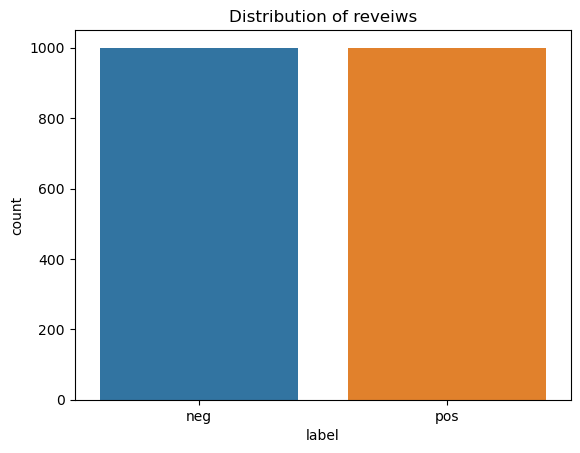

In [7]:
sns.countplot(data = df, x = "label")
plt.title("Distribution of reveiws")

The distribution of reveiws are pretty much perfect

### Scikit learn imports 

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC

### Feature extraction and model pipeline

In [78]:
X = df["review"]
y = df["label"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

Creating a pipeline to test different models

In [92]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [93]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

Predictions and Evaluation

In [94]:
pred = pipe.predict(X_test)

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388

0.8324742268041238


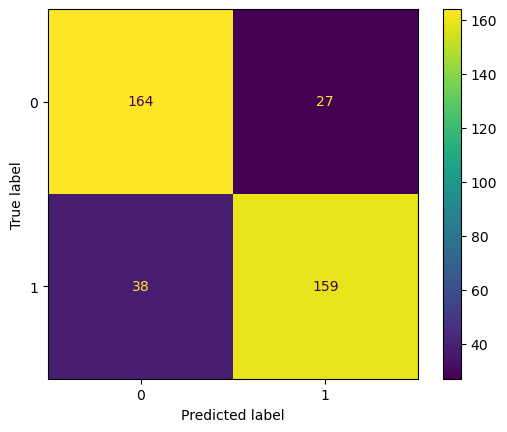

In [95]:
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, pred))
matrix.plot()

RBF SVC model => 82.73 % accuracy (83% F1 score)

Naive Bayes model => 80.92% accuracy (83% F1 score)

#### Linear SVC model => 83.24% accuracy (83% F1 score)